# Logstic Regression

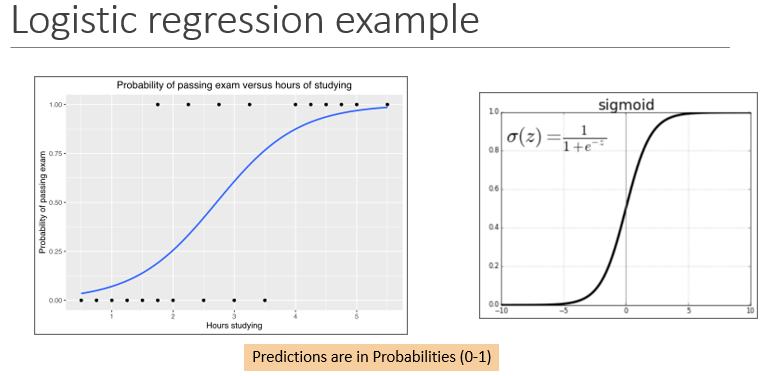

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

### Step 3 - Seperate X and Y

In [7]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### Step 4 - Create a preprocessing pipeline on X

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [15]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### Step 5 - Train Test Split
test - 0.33 

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=21
)

In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [18]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [19]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [20]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [21]:
xtrain.shape

(100, 4)

In [22]:
xtest.shape

(50, 4)

### Step 6 - Model Building

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### Step 7 - Model evaluation 

In [25]:
model.score(xtrain, ytrain)

0.98

In [26]:
model.score(xtest, ytest)

0.94

In [27]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [28]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [29]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [30]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [31]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


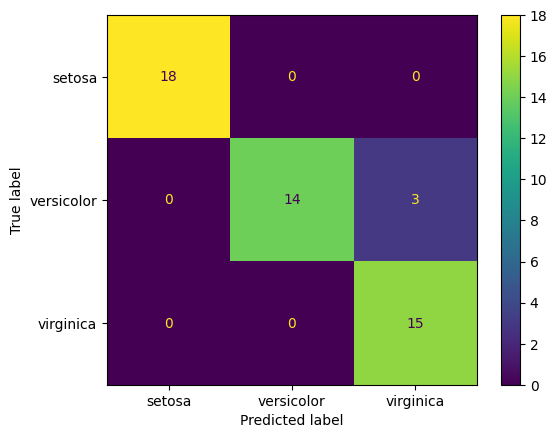

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### From above data the f1 macro avg on test data is 0.94 > 0.8 hence it is considered as a good model

### Step 8 - Out of sample prediction 

In [34]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [35]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [37]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [38]:
ypred = model.predict(xnew_pre)
ypred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [39]:
yprob = model.predict_proba(xnew_pre)
yprob

array([[1.93292727e-02, 8.82537594e-01, 9.81331333e-02],
       [1.80315390e-04, 6.76221053e-02, 9.32197579e-01],
       [9.73213051e-02, 8.91868487e-01, 1.08102083e-02],
       [7.45709340e-01, 2.54116291e-01, 1.74368528e-04],
       [5.90541932e-03, 3.31763397e-01, 6.62331183e-01],
       [9.63296887e-01, 3.67026084e-02, 5.04715947e-07],
       [1.60683756e-01, 8.11677570e-01, 2.76386741e-02],
       [7.55605408e-04, 1.55677416e-01, 8.43566978e-01],
       [9.85175448e-01, 1.48243463e-02, 2.05612795e-07],
       [8.87027458e-01, 1.12886703e-01, 8.58384446e-05],
       [2.30367528e-02, 8.97506058e-01, 7.94571891e-02],
       [2.62907569e-02, 9.48058330e-01, 2.56509126e-02],
       [3.40647499e-06, 1.34534099e-02, 9.86543184e-01],
       [5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [4.93349887e-04, 4.04352561e-01, 5.95154090e-01]])

In [40]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
xnew["species_pred"] = ypred
xnew[model.classes_] = yprob

In [42]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.019329,0.882538,9.813313e-02
1,6.9,3.1,5.1,2.3,virginica,0.000180,0.067622,9.321976e-01
2,5.1,2.5,3.0,1.1,versicolor,0.097321,0.891868,1.081021e-02
3,4.4,2.9,NaN,0.2,setosa,0.745709,0.254116,1.743685e-04
4,5.9,3.0,5.1,1.8,virginica,0.005905,0.331763,6.623312e-01
5,5.5,3.5,1.3,0.2,setosa,0.963297,0.036703,5.047159e-07
6,5.6,NaN,3.6,1.3,versicolor,0.160684,0.811678,2.763867e-02
7,6.5,3.0,5.2,2.0,virginica,0.000756,0.155677,8.435670e-01
8,5.3,3.7,1.5,0.2,setosa,0.985175,0.014824,2.056128e-07
9,5.1,3.4,1.5,NaN,setosa,0.887027,0.112887,8.583844e-05


In [43]:
xnew.to_csv("Results.csv", index=False)